<a href="https://colab.research.google.com/github/KSrimanNarayana/Fintech-Capstone-Project/blob/main/Loan_Default_BCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('loan.csv')

In [ ]:
#shape of the dataset
df.shape

(148670, 20)

In [ ]:
#checking for row level duplicates
df.duplicated().value_counts()

,count
False,148670


In [ ]:
#checking for null values percentage
100*df.isna().sum()/df.shape[0]

,0
ID,0.000000
year,0.000000
loan_limit,2.249277
Gender,0.000000
loan_type,0.000000
loan_purpose,0.090133
business_or_commercial,0.000000
loan_amount,0.000000
rate_of_interest,24.509989
Upfront_charges,26.664425


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

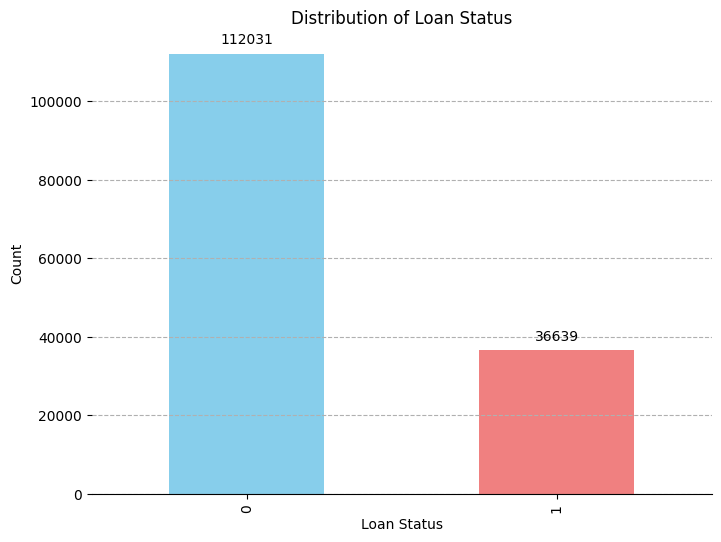

In [ ]:

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
status_counts = df['Status'].value_counts()
colors = ['skyblue', 'lightcoral']  # Define colors for each status

ax = status_counts.plot(kind='bar', color=colors)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y', linestyle='--')

plt.show()


In [ ]:
print('The Probability of Loan Defaulters are ',round((status_counts[1]/status_counts.sum())*100,2),'%')

The Probability of Loan Defaulters are  24.64 %


In [ ]:
print('The Probability of Loan Non Defaulters are ',round(100*status_counts[0]/status_counts.sum(),2),'%')

The Probability of Loan Non Defaulters are  75.36 %


The Chances of a applicant for defaulting a loan is 25%.

The Chances of a applicant for non-defaulting a loan is 75%.

In [ ]:
df['year'].min(),df['year'].max()

(2019, 2019)

minimum value and maximum value in year column is 2019.

The given dataset is from the year 2019 Loan applicants details.

In [ ]:
#droping  year column it is not much of a usefull, no viariation , not storing much of a information
#droping ID column
df=df.drop(['year','ID'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_limit                145326 non-null  object 
 1   Gender                    148670 non-null  object 
 2   loan_type                 148670 non-null  object 
 3   loan_purpose              148536 non-null  object 
 4   business_or_commercial    148670 non-null  object 
 5   loan_amount               148670 non-null  int64  
 6   rate_of_interest          112231 non-null  float64
 7   Upfront_charges           109028 non-null  float64
 8   property_value            133572 non-null  float64
 9   occupancy_type            148670 non-null  object 
 10  income                    139520 non-null  float64
 11  credit_type               148670 non-null  object 
 12  Credit_Score              148670 non-null  int64  
 13  co-applicant_credit_type  148670 non-null  o

In [ ]:
#unique values in categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

Unique values in column 'loan_limit':
['cf' nan 'ncf']

Unique values in column 'Gender':
['Sex Not Available' 'Male' 'Joint' 'Female']

Unique values in column 'loan_type':
['type1' 'type2' 'type3']

Unique values in column 'loan_purpose':
['p1' 'p4' 'p3' 'p2' nan]

Unique values in column 'business_or_commercial':
['nob/c' 'b/c']

Unique values in column 'occupancy_type':
['pr' 'sr' 'ir']

Unique values in column 'credit_type':
['EXP' 'EQUI' 'CRIF' 'CIB']

Unique values in column 'co-applicant_credit_type':
['CIB' 'EXP']

Unique values in column 'age':
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]

Unique values in column 'Region':
['south' 'North' 'central' 'North-East']



In [ ]:
#changing object datatype to categorical datatype to save memory
for col in categorical_cols:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   loan_limit                145326 non-null  category
 1   Gender                    148670 non-null  category
 2   loan_type                 148670 non-null  category
 3   loan_purpose              148536 non-null  category
 4   business_or_commercial    148670 non-null  category
 5   loan_amount               148670 non-null  int64   
 6   rate_of_interest          112231 non-null  float64 
 7   Upfront_charges           109028 non-null  float64 
 8   property_value            133572 non-null  float64 
 9   occupancy_type            148670 non-null  category
 10  income                    139520 non-null  float64 
 11  credit_type               148670 non-null  category
 12  Credit_Score              148670 non-null  int64   
 13  co-applicant_credit_type  148

Nearly we save upto 50% of memory then previous(original data).

In [ ]:
#unique values in categorical features
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

Unique values in column 'loan_limit':
['cf', NaN, 'ncf']
Categories (2, object): ['cf', 'ncf']

Unique values in column 'Gender':
['Sex Not Available', 'Male', 'Joint', 'Female']
Categories (4, object): ['Female', 'Joint', 'Male', 'Sex Not Available']

Unique values in column 'loan_type':
['type1', 'type2', 'type3']
Categories (3, object): ['type1', 'type2', 'type3']

Unique values in column 'loan_purpose':
['p1', 'p4', 'p3', 'p2', NaN]
Categories (4, object): ['p1', 'p2', 'p3', 'p4']

Unique values in column 'business_or_commercial':
['nob/c', 'b/c']
Categories (2, object): ['b/c', 'nob/c']

Unique values in column 'occupancy_type':
['pr', 'sr', 'ir']
Categories (3, object): ['ir', 'pr', 'sr']

Unique values in column 'credit_type':
['EXP', 'EQUI', 'CRIF', 'CIB']
Categories (4, object): ['CIB', 'CRIF', 'EQUI', 'EXP']

Unique values in column 'co-applicant_credit_type':
['CIB', 'EXP']
Categories (2, object): ['CIB', 'EXP']

Unique values in column 'age':
['25-34', '55-64', '35-44', '45

In [ ]:
#Stastical Summary on numerical features
df.describe()

,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status
count,1.486700e+05,112231.000000,109028.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,3.311177e+05,4.045476,3224.996127,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,1.839093e+05,0.561391,3251.121510,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,1.650000e+04,0.000000,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,1.965000e+05,3.625000,581.490000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,2.965000e+05,3.990000,2596.450000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,4.365000e+05,4.375000,4812.500000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,3.576500e+06,8.000000,60000.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


We can infer

1. LTV column has more variation in it's range(0-7831).might have chances of outliers.
2. Same for Income also, it's ranges from (0-57.8K) Dollars. high chances of presences of outliers.
3. Same for Property values too it's ranges from (8K - 16.508M)Dollars.very high chances of presences of outliers.
4. Looks like Upfront charges are also follows the same trend. it's ranges from (0-60K)Dollars where 75th percentile of data or Third quartile value is 4.8K.
5. Loan Amount ranges from 16k - 3.5M Dollars.
6. Credit Score are ranges from 500 - 900.
7. rate of interest ranges from (0-8)%.  

In [ ]:
df[df['property_value']==1.650800e+07]

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
17114,ncf,Joint,type1,p4,nob/c,2476500,NaN,NaN,16508000.0,pr,84000.0,CIB,809,EXP,65-74,15.001817,North,1


In [ ]:
df[df['loan_amount']==3.576500e+06]

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
4321,ncf,Male,type1,p1,nob/c,3576500,NaN,NaN,5208000.0,pr,119340.0,EXP,751,CIB,55-64,68.673195,North,1


In [ ]:
#creating a new feature Credit Score Grading
# below average - below <650
#Average          between 651 -700
#Fair             between    701 - 750
#Good             between    751 - 780
#Excellent        above 780

def credit_score_grade(score):
  if score < 650:
    return 'Below Average'
  elif 651 <= score <= 700:
    return 'Average'
  elif 701 <= score <= 750:
    return 'Fair'
  elif 751 <= score <= 780:
    return 'Good'
  else:
    return 'Excellent'

df['Credit_Score_Grade'] = df['Credit_Score'].apply(credit_score_grade)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   loan_limit                145326 non-null  category
 1   Gender                    148670 non-null  category
 2   loan_type                 148670 non-null  category
 3   loan_purpose              148536 non-null  category
 4   business_or_commercial    148670 non-null  category
 5   loan_amount               148670 non-null  int64   
 6   rate_of_interest          112231 non-null  float64 
 7   Upfront_charges           109028 non-null  float64 
 8   property_value            133572 non-null  float64 
 9   occupancy_type            148670 non-null  category
 10  income                    139520 non-null  float64 
 11  credit_type               148670 non-null  category
 12  Credit_Score              148670 non-null  int64   
 13  co-applicant_credit_type  148

In [ ]:
df[(df['Credit_Score']==900)&(df['Status']==1)]

,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status,Credit_Score_Grade
144,cf,Joint,type1,p3,nob/c,556500,NaN,NaN,NaN,ir,25680.0,EQUI,900,EXP,45-54,NaN,south,1,Excellent
924,cf,Female,type1,p4,nob/c,476500,NaN,NaN,498000.0,pr,7800.0,CIB,900,CIB,65-74,95.682731,North,1,Excellent
4308,cf,Female,type1,p4,nob/c,236500,NaN,NaN,418000.0,pr,3180.0,CRIF,900,CIB,55-64,56.578947,North,1,Excellent
4394,cf,Joint,type1,p3,nob/c,516500,NaN,NaN,NaN,pr,7380.0,EQUI,900,EXP,25-34,NaN,North,1,Excellent
6156,cf,Female,type1,p2,nob/c,156500,NaN,NaN,268000.0,pr,6840.0,CIB,900,CIB,55-64,58.395522,North,1,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142059,cf,Joint,type2,p3,b/c,366500,NaN,NaN,498000.0,pr,11280.0,CIB,900,EXP,45-54,73.594378,central,1,Excellent
142600,cf,Sex Not Available,type3,p4,nob/c,446500,NaN,NaN,NaN,pr,0.0,EQUI,900,EXP,55-64,NaN,south,1,Excellent
143332,cf,Female,type1,p3,nob/c,366500,NaN,NaN,NaN,pr,4860.0,EQUI,900,EXP,25-34,NaN,south,1,Excellent
145759,cf,Male,type1,p3,nob/c,176500,NaN,NaN,NaN,pr,2820.0,EQUI,900,EXP,45-54,NaN,North,1,Excellent


**Observation:**

Upon analyzing the dataset of loan defaulters, I identified 113 records where the credit score is 900, yet the loan status indicates that these individuals have defaulted (Loan Status = 1).

**Inference:**

A credit score of 900 is typically indicative of an excellent financial profile, making it highly unlikely that borrowers with such a score would default on their loans. This observation does not align with realistic financial behavior. Therefore, these data points are likely to represent noise or incorrect entries in the dataset rather than real-world occurrences.

**Suggested Action:**

Given that these records represent an unrealistic scenario and may introduce bias or inaccuracies in the model's predictions, I recommend removing these 113 records from the dataset. Dropping them would ensure the integrity of the model and lead to more reliable predictions.

In [ ]:
#removing noise data

df = df.drop(df[(df['Credit_Score'] == 900) & (df['Status'] == 1)].index)

In [ ]:
df.loc[(df['Credit_Score']==900),'Status'].value_counts()

,count
Status,
0,280


In [ ]:
df.shape

(148557, 19)

In [ ]:
#Stastical Summary on categorical features
df.describe(include=['category','object']).T

,count,unique,top,freq
loan_limit,145217,2,cf,135244
Gender,148557,4,Male,42321
loan_type,148557,3,type1,113093
loan_purpose,148423,4,p3,55883
business_or_commercial,148557,2,nob/c,127818
occupancy_type,148557,3,pr,138102
credit_type,148557,4,CIB,48123
co-applicant_credit_type,148557,2,CIB,74348
age,148359,7,45-54,34701
Region,148557,4,North,74676


In [ ]:
df.loc[df['loan_limit'].isna(),'Status'].value_counts()

,count
Status,
0,2463
1,877


In [ ]:
pd.crosstab(df['loan_limit'],df['Status'],normalize='index')

Status,0,1
loan_limit,,
cf,0.760877,0.239123
ncf,0.668204,0.331796


1. For Customers with Fixed Loan Limits (cf):

      - 76.1% of these customers are non-defaulters (status = 0).

      - 23.9% of these customers are defaulters (status = 1).

2. For Customers with Non-Fixed Loan Limits (ncf):

  - 66.8% of these customers are non-defaulters (status = 0).
  -33.2% of these customers are defaulters (status = 1).

**Inference on Loan Limit's Effect on Status**:

**Higher Default Rate for Non-Fixed Loan Limits:**
Customers with non-fixed loan limits (ncf) are more likely to be defaulters than those with fixed loan limits. Specifically, 33.2% of customers with non-fixed loan limits are defaulters, compared to only 23.9% of customers with fixed loan limits.

**Lower Default Rate for Fixed Loan Limits:** Customers with fixed loan limits (cf) have a lower likelihood of defaulting. The default rate is 23.9%, which is lower than the 33.2% default rate for those with non-fixed loan limits.

In [ ]:
#Hypothesis testing
from scipy.stats import chi2_contingency
ho = "thier is no statistically significant difference in default rates among loan applicants between customers with fixed and non-fixed loan limits"
ha = "thier is  statistically significant difference in default rates among loan applicants between customers with fixed and non-fixed loan limits"
contingency_table = pd.DataFrame({
    'Status 0': [102904, 6664],
    'Status 1': [32340, 3309]
}, index=['cf', 'ncf'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis:", ha)
else:
    print("Fail to reject the null hypothesis:", ho)

Reject the null hypothesis: thier is  statistically significant difference in default rates among loan applicants between customers with fixed and non-fixed loan limits


The data suggests that having a fixed loan limit is associated with a lower probability of defaulting (status = 1), whereas customers with non-fixed loan limits have a higher tendency to default. This could indicate that fixed loan limits might provide better control over borrowing amounts and reduce risk, leading to a lower default rate. On the other hand, non-fixed loan limits may introduce more flexibility but also more risk, which could explain the higher default rate.

In [ ]:
pd.crosstab(df['Gender'],df['Status'],normalize='index')

Status,0,1
Gender,,
Female,0.749367,0.250633
Joint,0.808963,0.191037
Male,0.738522,0.261478
Sex Not Available,0.714833,0.285167


Gender-wise Conditional Probabilities of Status:

Interpretation:

For Customers with gender = Female:

  - 74.9% of females are non-defaulters, and 25.1% are defaulters.

For Customers with gender = Joint:

  - 80.9% of individuals with "Joint" accounts are non-defaulters, and 19.1% are defaulters (the lowest default rate across categories).

For Customers with gender = Male:

  - 73.9% of males are non-defaulters, and 26.1% are defaulters.

For Customers with gender = Sex Not Available:

  - 71.5% of individuals with unavailable gender information are non-defaulters, and 28.5% are defaulters (the highest default rate).

Inference:

  - The Joint category has the lowest default rate, while the Sex Not Available category has the highest default rate.

  - Male and Female categories have fairly similar default rates, with males having a slightly higher default rate than females.

In [ ]:
df.loc[df['Gender'].isna(),'Status'].value_counts()

,count
Status,


In [ ]:
# Define the index (genders)
index = ['Female', 'Joint', 'Male', 'Sex Not Available']

# Count non-defaulters and defaulters for each gender
non_defaulters = [df.loc[(df['Gender'] == gender) & (df['Status'] == 0), 'Status'].count() for gender in index]
defaulters = [df.loc[(df['Gender'] == gender) & (df['Status'] == 1), 'Status'].count() for gender in index]

# Define hypotheses
ho = "There is no statistically significant difference in default rates among loan applicants based on gender."
ha = "There is a statistically significant difference in default rates among loan applicants based on gender."

# Create the contingency table
contingency_table = pd.DataFrame({
    'Status 0': non_defaulters,
    'Status 1': defaulters
}, index=index)

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis:", ha)
else:
    print("Fail to reject the null hypothesis:", ho)


Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on gender.


In [ ]:
pd.crosstab(df['loan_type'],df['Status'],normalize='index')

Status,0,1
loan_type,,
type1,0.772798,0.227202
type2,0.655287,0.344713
type3,0.749949,0.250051


Interpretation:

For Customers with loan type = Type 1 Loans:

  - 77.3% of borrowers with Type 1 loans are non-defaulters.
  - 22.7% of borrowers with Type 1 loans are defaulters.

For Customers with loan type = Type 2 Loans:

  - 65.5% of borrowers with Type 2 loans are non-defaulters.
  - 34.5% of borrowers with Type 2 loans are defaulters (the highest default rate among the three types).

For Customers with loan type = Type 3 Loans:

  - 74.9% of borrowers with Type 3 loans are non-defaulters.
  - 25.0% of borrowers with Type 3 loans are defaulters.

**Inference:**

Borrowers with Type 1 loans have the highest percentage of non-defaulters (77.3%) and the lowest percentage of defaulters (22.7%).

Type 2 loans exhibit the highest default rate at 34.5%, suggesting they may be riskier compared to the other types.

Types 1 and 3 have similar non-defaulter rates, but Type 3 has a slightly higher default rate than Type 1.

In [ ]:
# Define the index (loan type)
index = ['type1','type2','type3']

# Count non-defaulters and defaulters for each loan type
non_defaulters = [df.loc[(df['loan_type'] == _type) & (df['Status'] == 0), 'Status'].count() for _type in index]
defaulters = [df.loc[(df['loan_type'] == _type) & (df['Status'] == 1), 'Status'].count() for _type in index]

# Define hypotheses
ho = "There is no statistically significant difference in default rates among loan applicants based on loan type."
ha = "There is a statistically significant difference in default rates among loan applicants based on loan type."

# Create the contingency table
contingency_table = pd.DataFrame({
    'Status 0': non_defaulters,
    'Status 1': defaulters
}, index=index)

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
print("p-value :", p_value)
if p_value < alpha:
    print("Reject the null hypothesis:", ha)
else:
    print("Fail to reject the null hypothesis:", ho)


p-value : 1.7970757820762348e-284
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on loan type.


In [ ]:
df['loan_purpose'].isna().sum()

134

In [ ]:
df.loc[df['loan_purpose'].isna(),'Status'].value_counts()

,count
Status,
0,99
1,35


In [ ]:
#imputing missing values by frequency for categorical varaible
df['loan_purpose'].fillna('p3', inplace=True)

In [ ]:
pd.crosstab(df['loan_purpose'],df['Status'],normalize='index')

Status,0,1
loan_purpose,,
p1,0.741576,0.258424
p2,0.669826,0.330174
p3,0.750433,0.249567
p4,0.770856,0.229144


Interpretation:

For Customers with loan purpose = P1 Loans:

  - 74.2% of borrowers with loan purpose P1 are non-defaulters, while 25.8% are defaulters.

For Customers with loan purpose =  P2 Loans:

  - 66.9% of borrowers with loan purpose P2 are non-defaulters, and 33.0% are defaulters (the highest default rate among the loan purposes).

For Customers with loan purpose = P3 Loans:

   - 75.0% of borrowers with loan purpose P3 are non-defaulters, and 25.0% are defaulters.

For Customers with loan purpose = P4 Loans:

  - 77.1% of borrowers with loan purpose P4 are non-defaulters, and 22.9% are defaulters (the lowest default rate).

Inference:
Loan purpose P4 has the highest percentage of non-defaulters (77.1%) and the lowest percentage of defaulters (22.9%).

Loan purpose P2 shows the highest default rate (33.0%), suggesting that loans taken for this purpose might be riskier.

P1 and P3 have similar non-defaulter rates, with P3 slightly ahead.

In [ ]:
df.loc[df['loan_purpose'].isna(),'Status'].value_counts()

,count
Status,


In [ ]:
# Define the index (loan purpose)
index = df['loan_purpose'].unique()

# Count non-defaulters and defaulters for each loan purpose
non_defaulters = [df.loc[(df['loan_purpose'] == _type) & (df['Status'] == 0), 'Status'].count() for _type in index]
defaulters = [df.loc[(df['loan_purpose'] == _type) & (df['Status'] == 1), 'Status'].count() for _type in index]

# Define hypotheses
ho = "There is no statistically significant difference in default rates among loan applicants based on loan_purpose."
ha = "There is a statistically significant difference in default rates among loan applicants based on loan_purpose."

# Create the contingency table
contingency_table = pd.DataFrame({
    'Status 0': non_defaulters,
    'Status 1': defaulters
}, index=index)

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
print("p-value :", p_value)
if p_value < alpha:
    print("Reject the null hypothesis:", ha)
else:
    print("Fail to reject the null hypothesis:", ho)


p-value : 4.593575846366892e-52
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on loan_purpose.


In [ ]:
# business_or_commercial

pd.crosstab(df['business_or_commercial'],df['Status'],normalize='index')

Status,0,1
business_or_commercial,,
b/c,0.655287,0.344713
nob/c,0.770165,0.229835


Interpretation:

For Business/Commercial Loans (b/c):

  - 65.5% of borrowers with business/commercial loans are non-defaulters.
  - 34.5% of borrowers with business/commercial loans are defaulters.

For Non-Business/Commercial Loans (nob/c):

  - 77.0% of borrowers with non-business/commercial loans are non-defaulters.
  - 22.9% of borrowers with non-business/commercial loans are defaulters.

Inference:

Borrowers with non-business/commercial loans (nob/c) have a higher percentage of non-defaulters (77.0%) compared to those with business/commercial loans (b/c), which have a non-defaulter rate of 65.5%.

The **default rate for business/commercial loans (34.5%) is significantly higher** than that for non-business/commercial loans (22.9%).

In [ ]:
# Define the index (business_or_commercial)
index = df['business_or_commercial'].unique()

# Count non-defaulters and defaulters for each loan purpose
non_defaulters = [df.loc[(df['business_or_commercial'] == _type) & (df['Status'] == 0), 'Status'].count() for _type in index]
defaulters = [df.loc[(df['business_or_commercial'] == _type) & (df['Status'] == 1), 'Status'].count() for _type in index]

# Define hypotheses
ho = "There is no statistically significant difference in default rates among loan applicants based on business_or_commercial."
ha = "There is a statistically significant difference in default rates among loan applicants based on business_or_commercial."

# Create the contingency table
contingency_table = pd.DataFrame({
    'Status 0': non_defaulters,
    'Status 1': defaulters
}, index=index)

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
print("p-value :", p_value)
if p_value < alpha:
    print("Reject the null hypothesis:", ha)
else:
    print("Fail to reject the null hypothesis:", ho)


p-value : 5.0634347141010355e-278
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on business_or_commercial.


In [ ]:
#occupancy_type

pd.crosstab(df['occupancy_type'],df['Status'],normalize='index')

Status,0,1
occupancy_type,,
ir,0.700996,0.299004
pr,0.757498,0.242502
sr,0.729834,0.270166


Interpretation:

Investor (ir):

  - 70.1% of borrowers with investment properties are non-defaulters.
  - 29.9% are defaulters.

Primary Residence (pr):

  - 75.7% of borrowers for primary residences are non-defaulters.
  - 24.3% are defaulters (the lowest default rate among the occupancy types).

Secondary Residence (sr):

  - 72.9% of borrowers with secondary residences are non-defaulters.
  - 27.0% are defaulters.

Inference:

Borrowers with primary residences (pr) have the highest percentage of non-defaulters (75.7%) and the lowest percentage of defaulters (24.3%).
**Investors (ir) show a relatively higher default rate (29.9%)** compared to both primary and secondary residences.

Secondary residences (sr) have a non-defaulter rate of 72.9%, which is lower than that of primary residences but higher than that of investors.

In [ ]:
def HT(index,col):


  # Count non-defaulters and defaulters for each col
  non_defaulters = [df.loc[(df[col] == _type) & (df['Status'] == 0), 'Status'].count() for _type in index]
  defaulters = [df.loc[(df[col] == _type) & (df['Status'] == 1), 'Status'].count() for _type in index]

  # Define hypotheses
  ho = f"There is no statistically significant difference in default rates among loan applicants based on {col}."
  ha = f"There is a statistically significant difference in default rates among loan applicants based on {col}."

  # Create the contingency table
  contingency_table = pd.DataFrame({
      'Status 0': non_defaulters,
      'Status 1': defaulters
  }, index=index)

  # Perform the chi-square test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  # Interpret the results
  alpha = 0.05
  print("p-value :", p_value)
  if p_value < alpha:
      print("Reject the null hypothesis:", ha)
  else:
      print("Fail to reject the null hypothesis:", ho)


In [ ]:
col="occupancy_type"
index = df[col].unique()
HT(index,col)

p-value : 5.844142873785667e-29
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on occupancy_type.


In [ ]:
col = "credit_type"
index = df[col].unique()
HT(index,col)
pd.crosstab(df[col],df['Status'],normalize='index')

p-value : 0.0
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on credit_type.


Status,0,1
credit_type,,
CIB,0.842466,0.157534
CRIF,0.838192,0.161808
EQUI,0.000066,0.999934
EXP,0.840614,0.159386


Interpretation:

CIB (Credit Information Bureau):

  - 84.2% of borrowers with CIB credit types are non-defaulters.
  - 15.8% are defaulters.

CRIF (Credit Reference Information Framework):

- 83.8% of borrowers with CRIF credit types are non-defaulters.

- 16.2% are defaulters.

EQUI (Equifax):

  - 0.000066% of borrowers with EQUI credit types are non-defaulters, which is nearly 0%.

  - 99.9934% of borrowers are defaulters (an extremely high default rate).

EXP (Experian):

  - 84.1% of borrowers with EXP credit types are non-defaulters.
  - 15.9% are defaulters.


Inference:

Both CIB and CRIF show high non-defaulter rates around 84%, suggesting they are relatively reliable credit types.

**EQUI has an extraordinarily high default rate of 99.9934%, indicating a very high risk associated with borrowers** classified under this credit type.

EXP is similar to CIB and CRIF, with a non-defaulter rate of 84.1%.

In [ ]:
col = "Region"
index = df[col].unique()
HT(index,col)
pd.crosstab(df[col],df['Status'],normalize='index')

p-value : 1.5497034849597647e-81
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on Region.


Status,0,1
Region,,
North,0.775363,0.224637
North-East,0.695547,0.304453
central,0.725619,0.274381
south,0.734338,0.265662


Interpretation:

North:

77.5% of borrowers from the North region are non-defaulters.
22.5% are defaulters.

North-East:

69.6% of borrowers from the North-East region are non-defaulters.
30.4% are defaulters (the highest default rate among the regions).

Central:

72.6% of borrowers from the Central region are non-defaulters.
27.4% are defaulters.

South:

73.4% of borrowers from the South region are non-defaulters.
26.6% are defaulters.

Inference:

Borrowers from the North region exhibit the highest percentage of non-defaulters (77.5%) and the lowest percentage of defaulters (22.5%).

**The North-East region shows the highest default rate (30.4%), suggesting it may be a riskier area for loan defaults.**

Central and South regions have similar non-defaulter rates of approximately 72.6% and 73.4%, respectively, indicating a moderate risk compared to the North.

In [ ]:
col = "co-applicant_credit_type"
index = df[col].unique()
HT(index,col)
pd.crosstab(df[col],df['Status'],normalize='index')


p-value : 0.0
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on co-applicant_credit_type.


Status,0,1
co-applicant_credit_type,,
CIB,0.816148,0.183852
EXP,0.691992,0.308008


Interpretation:

CIB (Credit Information Bureau):

81.6% of borrowers with co-applicants from CIB credit types are non-defaulters.
18.4% are defaulters.

EXP (Experian):

69.2% of borrowers with co-applicants from EXP credit types are non-defaulters.
30.8% are defaulters (the higher default rate compared to CIB).

Inference:

Borrowers with co-applicants from CIB exhibit a higher percentage of non-defaulters (81.6%) and a lower percentage of defaulters (18.4%) compared to those with co-applicants from EXP.

**The default rate for EXP is significantly higher at 30.8%, suggesting that co-applicants from this credit type may pose a higher risk.**

In [ ]:
col = "age"
#imputing missing values by frequency for categorical varaible
df[col].fillna('45-54', inplace=True)
index = df[col].unique()

HT(index,col)
pd.crosstab(df[col],df['Status'],normalize='index')

p-value : 2.1962116415698292e-75
Reject the null hypothesis: There is a statistically significant difference in default rates among loan applicants based on age.


Status,0,1
age,,
25-34,0.778527,0.221473
35-44,0.777761,0.222239
45-54,0.755638,0.244362
55-64,0.741657,0.258343
65-74,0.732358,0.267642
<25,0.711078,0.288922
>74,0.701005,0.298995


Interpretation:

Age < 25:

71.1% of borrowers are non-defaulters.
28.9% are defaulters.

Age 25-34:

77.9% are non-defaulters.
22.1% are defaulters.

Age 35-44:

77.8% are non-defaulters.
22.2% are defaulters.

Age 45-54:

75.6% are non-defaulters.
24.4% are defaulters.

Age 55-64:

74.2% are non-defaulters.
25.8% are defaulters.

Age 65-74:

73.2% are non-defaulters.
26.8% are defaulters.

Age > 74:

70.1% are non-defaulters.
29.9% are defaulters.

Inference:

Borrowers in the 25-34 age group have the highest percentage of non-defaulters (77.9%), indicating a lower risk of default.

**The <25 age group has a relatively high default rate of 28.9%, suggesting that younger borrowers may pose a higher risk.**

**The default rates tend to increase slightly with age, especially for those over 74, where 29.9% are defaulters.**

In [ ]:
col = "Credit_Score_Grade"
index = df[col].unique()
HT(index,col)
pd.crosstab(df[col],df['Status'],normalize='index')

p-value : 0.3747028260258142
Fail to reject the null hypothesis: There is no statistically significant difference in default rates among loan applicants based on Credit_Score_Grade.


Status,0,1
Credit_Score_Grade,,
Average,0.756585,0.243415
Below Average,0.753656,0.246344
Excellent,0.751580,0.248420
Fair,0.758517,0.241483
Good,0.755458,0.244542


Interpretation:

Average Credit Score:

75.7% of borrowers with an average credit score are non-defaulters.
24.3% are defaulters.

Below Average Credit Score:

75.4% are non-defaulters.
24.6% are defaulters.

Excellent Credit Score:

75.2% are non-defaulters.
24.8% are defaulters.

Fair Credit Score:

75.9% are non-defaulters.
24.1% are defaulters.

Good Credit Score:

75.5% are non-defaulters.
24.5% are defaulters.

Inference:

The percentages of non-defaulters are quite similar across all credit score grades, ranging from 75.2% to 75.9% for non-defaulters.

The percentage of defaulters also does not vary significantly among the different grades, staying within the range of 24.1% to 24.8%.

Hypothesis Test Result:

by doing  hypothesis test (likely a chi-square test) and obtained a p-value of 0.3747028260258142.

Since this p-value is greater than the common alpha level of 0.05, you fail to reject the null hypothesis. This means that there is no statistically significant difference in default rates among loan applicants based on their Credit Score Grade.

Conclusion:
Given the results, the Credit Score Grade does not appear to significantly influence the likelihood of default among loan applicants in your dataset. It suggests that borrowers, regardless of their credit score grades, have relatively similar default rates.

In [ ]:
#for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value',
       'income', 'Credit_Score', 'LTV', 'Status'],
      dtype='object')

In [ ]:
#Descriptive Statistics

df.groupby('Status')[['Upfront_charges', 'loan_amount', 'rate_of_interest', 'property_value','income','Credit_Score']].describe().T


Status                             0             1
Upfront_charges  count  1.088750e+05  1.510000e+02
                 mean   3.227329e+03  1.553585e+03
                 std    3.251674e+03  2.312780e+03
                 min    0.000000e+00  0.000000e+00
                 25%    5.843900e+02  0.000000e+00
                 50%    2.600000e+03  6.806000e+02
                 75%    4.815315e+03  2.265615e+03
                 max    6.000000e+04  1.558400e+04
loan_amount      count  1.120310e+05  3.652600e+04
                 mean   3.349908e+05  3.193169e+05
                 std    1.749166e+05  2.087111e+05
                 min    2.650000e+04  1.650000e+04
                 25%    2.065000e+05  1.765000e+05
                 50%    3.065000e+05  2.765000e+05
                 75%    4.465000e+05  4.165000e+05
                 max    3.006500e+06  3.576500e+06
rate_of_interest count  1.120310e+05  1.980000e+02
                 mean   4.044931e+00  4.349091e+00
                 std    5.613556e-01  4.952997e-01
                 min    0.000000e+00  3.125000e+00
                 25%    3.625000e+00  3.990000e+00
                 50%    3.990000e+00  4.312500e+00
                 75%    4.375000e+00  4.750000e+00
                 max    8.000000e+00  5.500000e+00
property_value   count  1.120290e+05  2.146100e+04
                 mean   5.056061e+05  4.578029e+05
                 std    3.427845e+05  4.365419e+05
                 min    8.000000e+03  8.000000e+03
                 25%    2.880000e+05  2.280000e+05
                 50%    4.280000e+05  3.480000e+05
                 75%    6.380000e+05  5.580000e+05
                 max    9.268000e+06  1.650800e+07
income           count  1.041200e+05  3.529200e+04
                 mean   7.204014e+03  6.232644e+03
                 std    6.201340e+03  7.254853e+03
                 min    0.000000e+00  0.000000e+00
                 25%    4.020000e+03  3.000000e+03
                 50%    6.000000e+03  4.860000e+03
                 75%    8.760000e+03  7.620000e+03
                 max    3.772200e+05  5.785800e+05
Credit_Score     count  1.120310e+05  3.652600e+04
                 mean   6.995238e+02  6.999835e+02
                 std    1.156745e+02  1.161372e+02
                 min    5.000000e+02  5.000000e+02
                 25%    5.990000e+02  5.990000e+02
                 50%    6.990000e+02  6.990000e+02
                 75%    8.000000e+02  8.020000e+02
                 max    9.000000e+02  8.990000e+02

From the **descriptive statistics provided for upfront charges** by default status (Status = 0 for non-defaulters and Status = 1 for defaulters), we can uncover some insights into the relationship between upfront charges and the likelihood of default:

Summary of Insights:

Count:

There are far more non-defaulters (108,875) than defaulters (151) in the dataset, which suggests a class imbalance.

Mean:

Non-Defaulters: The mean upfront charges for non-defaulters is 3,227.

Defaulters: The mean upfront charges for defaulters is 1,554.

Insight: Defaulters tend to have significantly lower upfront charges compared to non-defaulters. This could indicate that higher upfront charges might act as a barrier to default, possibly because borrowers with higher upfront charges are more committed or have better financial stability.

Standard Deviation (std):

The standard deviation for non-defaulters is 3,252, while for defaulters, it's 2,313.

Insight: There is higher variability in upfront charges for non-defaulters. This could mean that non-defaulters are a more diverse group in terms of the upfront amounts they pay, while defaulters tend to have a narrower range of upfront charges.

Min, 25th Percentile, 50th Percentile (Median), 75th Percentile:

Non-Defaulters:

25th percentile: 584.39

Median (50th percentile): 2,600

75th percentile: 4,815.31

Defaulters:

25th percentile: 0

Median: 680.6

75th percentile: 2,265.61

Insight: For defaulters, the 25th percentile value is 0, and the median upfront charge is also significantly lower (680.6 vs 2,600 for non-defaulters). This suggests that defaulters are more likely to either have no upfront charges or very small upfront charges compared to non-defaulters.

Max:

The maximum upfront charge for non-defaulters is 60,000, while for defaulters, it's 15,584.

Insight: This confirms that **non-defaulters are capable of paying much higher upfront charges than defaulters**. Borrowers with lower upfront commitments may struggle to meet future financial obligations.

Possible Interpretations:

**Lower Upfront Charges:** Borrowers with lower upfront charges are more likely to default. This could indicate a correlation between financial readiness (as evidenced by the ability to pay higher upfront costs) and the likelihood of default.

**Barrier to Entry:** Higher upfront charges might serve as a deterrent to less financially stable borrowers, thereby reducing the risk of default. On the other hand, lower upfront charges might make loans more accessible to higher-risk borrowers, increasing default likelihood.

From the **descriptive statistics of loan amounts** for both non-defaulters (Status = 0) and defaulters (Status = 1), we can draw several key insights:

Key Metrics Overview:


Count:

Non-Defaulters: 112,031 loan records.

Defaulters: 36,526 loan records.

Insight: This shows a larger sample of non-defaulters compared to defaulters.

Mean Loan Amount:

Non-Defaulters: $334,990.

Defaulters: $319,317.

Insight: On average, defaulters have slightly lower loan amounts compared to non-defaulters. This could indicate that larger loans tend to be handled better or that smaller loan borrowers might struggle more.

Standard Deviation (std):

Non-Defaulters: $174,916.

Defaulters: $208,711.

Insight: The variability in loan amounts is higher among defaulters. This suggests that defaulters are more diverse in the loan amounts they take, whereas non-defaulters tend to take more similar loan sizes.

Minimum Loan Amount:

Non-Defaulters: $26,500.

Defaulters: $16,500.

Insight: Defaulters are more likely to have smaller minimum loan amounts. This could point to borrowers with smaller loans being more financially vulnerable.

Percentiles (25th, 50th, 75th):

Non-Defaulters:

25th percentile: $206,500

50th percentile (Median): $306,500

75th percentile: $446,500

Defaulters:
25th percentile: $176,500

50th percentile (Median): $276,500

75th percentile: $416,500

Insight: Across all percentiles, defaulters tend to have lower loan amounts than non-defaulters. The median loan amount for defaulters is $30,000 less than for non-defaulters. This further reinforces that defaulters tend to take smaller loans.

Maximum Loan Amount:

Non-Defaulters: $3,006,500.

Defaulters: $3,576,500.

Insight: Interestingly, defaulters have a higher maximum loan amount than non-defaulters. This suggests that while defaulters tend to have smaller loans on average, a small group of defaulters takes on very large loans.

Summary of Insights:

Defaulters generally have lower average loan amounts compared to non-defaulters.

The variability in loan amounts is higher for defaulters, indicating that defaulters come from a more diverse range of loan sizes.

Smaller loan amounts (in terms of the minimum and percentiles) are more common among defaulters, which could point to higher risk associated with smaller loans, possibly because these borrowers are less financially stable.

The higher maximum loan amount for defaulters suggests that there might be a small group of borrowers with exceptionally high loans that face difficulties in repayment.

From the **descriptive statistics for interest rates** among both non-defaulters (Status = 0) and defaulters (Status = 1), we can extract the following insights:

Key Metrics Overview:

Count:

Non-Defaulters: 112,031 records.

Defaulters: 198 records.

Insight: There is a small sample of defaulters compared to non-defaulters in this dataset, so any findings should be taken with caution due to the disparity in sample sizes.

Mean Interest Rate:

Non-Defaulters: 4.04%

Defaulters: 4.35%

Insight: On average, defaulters have higher interest rates compared to non-defaulters, suggesting that borrowers with higher rates might have a greater chance of defaulting. This could be because higher interest rates translate into higher repayment burdens.
Standard Deviation (std):

Non-Defaulters: 0.561%

Defaulters: 0.495%

Insight: There is slightly less variability in interest rates among defaulters, indicating that defaulters tend to cluster around higher interest rates, while non-defaulters have a broader spread of interest rates.

Minimum Interest Rate:

Non-Defaulters: 0.00%

Defaulters: 3.125%

Insight: Some non-defaulters have interest rates of 0%, indicating they could be on special loan programs or have fully paid down their interest obligations. Defaulters, on the other hand, all have positive interest rates, possibly indicating higher financial burdens.
Percentiles (25th, 50th, 75th):

Non-Defaulters:

25th percentile: 3.625%

50th percentile (Median): 3.99%

75th percentile: 4.375%

Defaulters:

25th percentile: 3.99%

50th percentile (Median): 4.31%

75th percentile: 4.75%

Insight: Across the board, defaulters tend to have higher interest rates at all percentiles compared to non-defaulters. The median interest rate for defaulters is higher than that of non-defaulters by 0.32%. This suggests that borrowers with higher-than-average interest rates may be more prone to default.

Maximum Interest Rate:

Non-Defaulters: 8.00%

Defaulters: 5.50%

Insight: The maximum interest rate among non-defaulters is much higher. This could mean that some borrowers manage to avoid default despite having high interest rates, likely due to other favorable factors (e.g., higher income, better credit profiles).

Summary of Insights:

Defaulters generally have higher average interest rates compared to non-defaulters, which suggests that borrowers paying more interest may be at greater risk of default.

Higher interest rates at all percentiles among defaulters imply that interest rate levels play a role in default risk.

Less variability in defaulters' interest rates (smaller standard deviation) shows that most defaulters tend to cluster around certain high interest rate levels, while non-defaulters show more spread across the rate spectrum.

The 0% interest rate in some non-defaulters suggests certain favorable conditions for these borrowers, possibly contributing to their ability to stay current on their loans.



From the **descriptive statistics of property values** for both non-defaulters (Status = 0) and defaulters (Status = 1), we can uncover several key insights related to the correlation between property value and
the likelihood of default:



Key Metrics Overview:

Count:

Non-Defaulters: 112,029 property records.

Defaulters: 21,461 property records.

Insight: There is a substantially higher number of properties associated with non-defaulters compared to defaulters.

Mean Property Value:

Non-Defaulters: $505,606.

Defaulters: $457,803.

Insight: On average, non-defaulters own properties with higher values than defaulters, indicating that higher property values might be associated with better financial stability and lower default risk.

Standard Deviation (std):

Non-Defaulters: $342,785.

Defaulters: $436,541.

Insight: There is higher variability in property values among defaulters than among non-defaulters. This indicates that defaulters come from a broader range of property values, suggesting that property value alone may not be a definitive indicator of default risk.

Minimum Property Value:

Non-Defaulters: $8,000.

Defaulters: $8,000.

Insight: Both groups have similarly low minimum property values, indicating that even borrowers with very low-value properties can avoid default or, conversely, default despite owning lower-value properties.

Percentiles (25th, 50th, 75th):

Non-Defaulters:

25th percentile: $288,000

50th percentile (Median): $428,000

75th percentile: $638,000

Defaulters:

25th percentile: $228,000

50th percentile (Median): $348,000

75th percentile: $558,000

Insight: At every percentile, non-defaulters tend to have significantly higher property values than defaulters. For instance, the median property value for defaulters is about $80,000 less than for non-defaulters. This could imply that higher property values provide a financial cushion, reducing default risk.

Maximum Property Value:

Non-Defaulters: $9,268,000.

Defaulters: $16,508,000.

Insight: While non-defaulters generally have higher property values, the maximum property value among defaulters is significantly higher. This suggests that a small group of defaulters own very high-value properties but still face repayment challenges, possibly due to other financial constraints or over-leveraging.

Summary of Insights:

Non-defaulters generally own higher-value properties compared to defaulters, which suggests that higher property values may be associated with a lower likelihood of default.

The higher variability in property values among defaulters points to a more diverse financial profile for those who default, indicating that property value alone doesn't fully explain default risk.

At all percentiles, defaulters tend to have lower property values, reinforcing that borrowers with lower-value properties may be at higher risk of default.

Interestingly, there is a subset of high-value property owners who default, suggesting that owning valuable assets does not guarantee financial stability. This could point to other factors (e.g., loan size, interest rates, or liquidity issues) contributing to their defaults.


In conclusion, property value appears to be a significant factor in distinguishing defaulters from non-defaulters, with lower property values associated with higher default risk.

However, it is not the sole factor, as some high-value property owners still default, suggesting that property value needs to be considered alongside other financial metrics for a complete assessment of default tendencies.








Descriptive statistics of Income Analysis

Key Metrics Overview:

Count:

Non-Defaulters: 104,120 records.

Defaulters: 35,292 records.

Insight: The dataset contains significantly more records for non-defaulters than defaulters, but the sample size for defaulters is still substantial.

Mean Income:

Non-Defaulters: $7,204.

Defaulters: $6,233.

Insight: On average, non-defaulters have higher incomes than defaulters, suggesting that borrowers with higher incomes are less likely to default. This may indicate that higher income levels provide better financial stability.

Standard Deviation (std):

Non-Defaulters: $6,201.


Defaulters: $7,255.

Insight: There is more variability in income among defaulters compared to non-defaulters. This indicates that defaulters include both low-income and high-income individuals, suggesting income alone is not a sole predictor of default risk.

Percentiles (25th, 50th, 75th):

Non-Defaulters:

25th percentile: $4,020

50th percentile (Median): $6,000

75th percentile: $8,760

Defaulters:

25th percentile: $3,000

50th percentile (Median): $4,860

75th percentile: $7,620

Insight: Across the percentiles, non-defaulters have higher incomes at each level, implying that borrowers with lower incomes are more prone to default. The income gap between non-defaulters and defaulters becomes noticeable starting from the 25th percentile.

Maximum Income:

Non-Defaulters: $377,220

Defaulters: $578,580

Insight: Interestingly, the maximum income for defaulters is higher than for non-defaulters, suggesting that some high-income borrowers still default. This could imply that high-income individuals may take on greater financial obligations, increasing their risk of default despite earning more.


Credit Score Analysis

Key Metrics Overview:

Count:

Non-Defaulters: 112,031 records.

Defaulters: 36,526 records.

Insight: Credit scores are well-represented across both defaulters and non-defaulters, providing a good basis for comparison.

Mean Credit Score:

Non-Defaulters: 699.5

Defaulters: 699.98

Insight: Surprisingly, the mean credit score is almost identical for both defaulters and non-defaulters, suggesting that credit score alone may not be a strong predictor of default. This may imply that other factors such as income, loan terms, or financial habits could play a larger role.

Standard Deviation (std):

Non-Defaulters: 115.67

Defaulters: 116.14

Insight: There is very little difference in the variability of credit scores between the two groups, reinforcing the notion that credit scores alone may not be sufficient for distinguishing between defaulters and non-defaulters.

Percentiles (25th, 50th, 75th):

Non-Defaulters:

25th percentile: 599

50th percentile (Median): 699

75th percentile: 800

Defaulters:


25th percentile: 599

50th percentile (Median): 699

75th percentile: 802

Insight: The percentile values are almost identical for defaulters and non-defaulters. This suggests that while credit score is often used as a financial health indicator, it may not be strongly associated with default in this dataset. The higher percentile scores (75th) are close for both groups.

Maximum Credit Score:

Non-Defaulters: 900

Defaulters: 899

Insight: Both groups have similarly high maximum credit scores, reinforcing that even high credit score individuals can default.

Summary of Insights:

Income:

Higher income levels are associated with lower default risk. Defaulters tend to have lower incomes, but income variability is greater among defaulters.

Non-defaulters consistently earn more across all percentiles, suggesting income plays a protective role against default.

Interestingly, some high-income borrowers still default, potentially due to larger financial commitments.

Credit Score:

Surprisingly, there is little to no difference in average credit scores between defaulters and non-defaulters.

This indicates that credit score may not be as reliable a predictor of default in this case.

Both defaulters and non-defaulters span the full range of credit scores, from very low to very high, showing that high credit scores alone do not guarantee protection against default.


In [ ]:
# Remove rows with NaNs or Infs in any of the selected columns
df_clean = df[['loan_amount', 'rate_of_interest', 'property_value', 'Upfront_charges', 'Status']].replace([np.inf, -np.inf], np.nan).dropna()

# Perform the point-biserial correlation on cleaned data
from scipy.stats import pointbiserialr

loan_corr, _ = pointbiserialr(df_clean['loan_amount'], df_clean['Status'])
interest_corr, _ = pointbiserialr(df_clean['rate_of_interest'], df_clean['Status'])
property_corr, _ = pointbiserialr(df_clean['property_value'], df_clean['Status'])
upfront_corr, _ = pointbiserialr(df_clean['Upfront_charges'], df_clean['Status'])

print(loan_corr, interest_corr, property_corr, upfront_corr)


-0.02453521996356722 0.027416399420856025 -0.02586208523780587 -0.019145930738505554


Interpretation of the Correlation Coefficients:

Loan Amount:

Correlation = -0.0245

Interpretation: There is a very weak negative correlation between loan amount and default status. This suggests that higher loan amounts are slightly less likely to result in default, but the effect is minimal and not practically significant.

Interest Rate:

Correlation = 0.0274

Interpretation: There is a very weak positive correlation between interest rate and default status. This means that as the interest rate increases, the likelihood of default also increases slightly. However, the correlation is so small that it has little practical importance.

Property Value:

Correlation = -0.0259

Interpretation: There is a very weak negative correlation between property value and default status. This suggests that higher property values are slightly associated with a lower likelihood of default, but the effect is very small.

Upfront Charges:

Correlation = -0.0191

Interpretation: There is a very weak negative correlation between upfront charges and default status. This implies that higher upfront charges are marginally associated with a lower chance of default, but the correlation is too small to be of practical significance.

General Insight:

All correlations are very close to 0, indicating almost no linear relationship between these financial variables and the likelihood of default.

Although the signs of the correlations suggest small tendencies (e.g., higher loan amounts and property values slightly decreasing default risk, higher interest rates slightly increasing it), the magnitude of these correlations is so weak that they are unlikely to be practically useful for predicting default risk on their own.

<Axes: xlabel='Status', ylabel='loan_amount'>

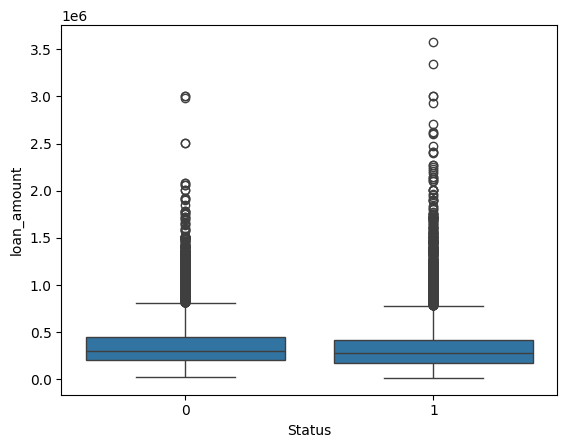

In [ ]:

sns.boxplot(x='Status', y='loan_amount', data=df)





<Axes: xlabel='Status', ylabel='rate_of_interest'>

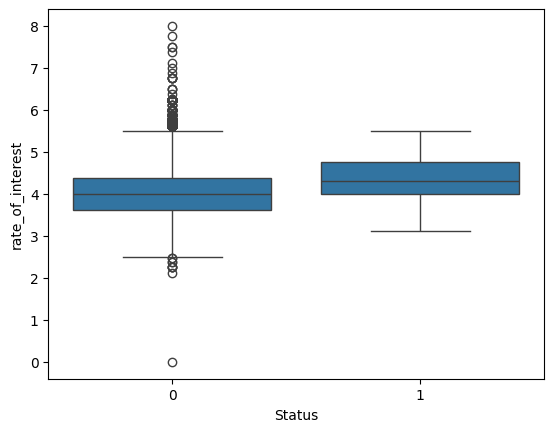

In [ ]:
sns.boxplot(x='Status', y='rate_of_interest', data=df)

<Axes: xlabel='Status', ylabel='Upfront_charges'>

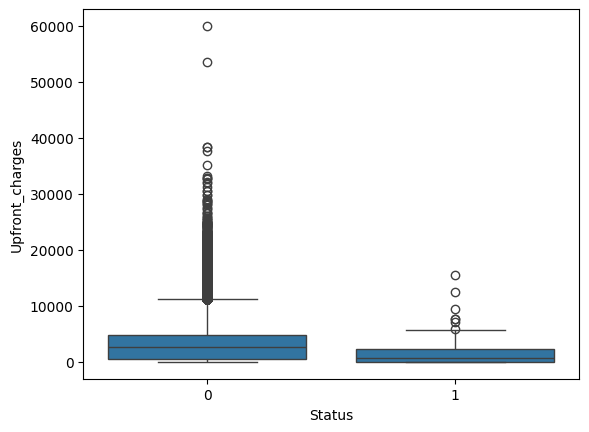

In [ ]:
sns.boxplot(x='Status', y='Upfront_charges', data=df)

<Axes: xlabel='Status', ylabel='property_value'>

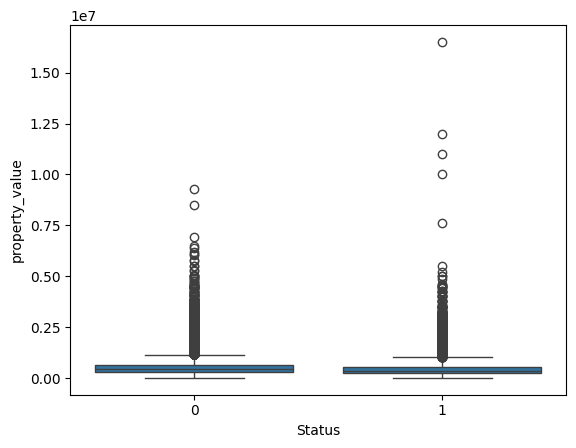

In [ ]:
sns.boxplot(x='Status', y='property_value', data=df)

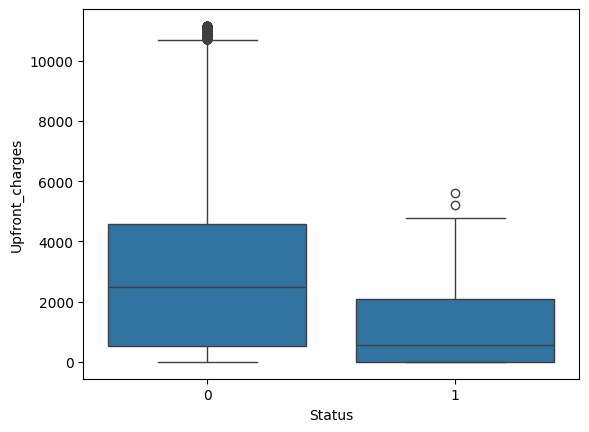

In [ ]:
def remove_outliers_iqr(data, column):
  """Removes outliers from a column using the IQR method."""
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


# Group data by Status
grouped = df.groupby('Status')

# Remove outliers for property_value within each group
df_no_outliers = pd.DataFrame()
for status, group in grouped:
  group_no_outliers = remove_outliers_iqr(group, 'Upfront_charges')
  df_no_outliers = pd.concat([df_no_outliers, group_no_outliers])


# Now df_no_outliers contains the data with outliers removed for property_value in each Status group.

# You can visualize the result using box plots:
sns.boxplot(x='Status', y='Upfront_charges', data=df_no_outliers)
plt.show()


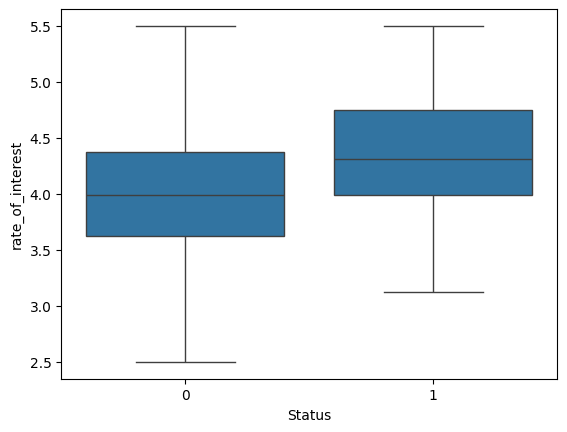

In [ ]:
def remove_outliers_iqr(data, column):
  """Removes outliers from a column using the IQR method."""
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


# Group data by Status
grouped = df.groupby('Status')

# Remove outliers for property_value within each group
df_no_outliers = pd.DataFrame()
for status, group in grouped:
  group_no_outliers = remove_outliers_iqr(group, 'rate_of_interest')
  df_no_outliers = pd.concat([df_no_outliers, group_no_outliers])


# Now df_no_outliers contains the data with outliers removed for property_value in each Status group.

# You can visualize the result using box plots:
sns.boxplot(x='Status', y='rate_of_interest', data=df_no_outliers)
plt.show()


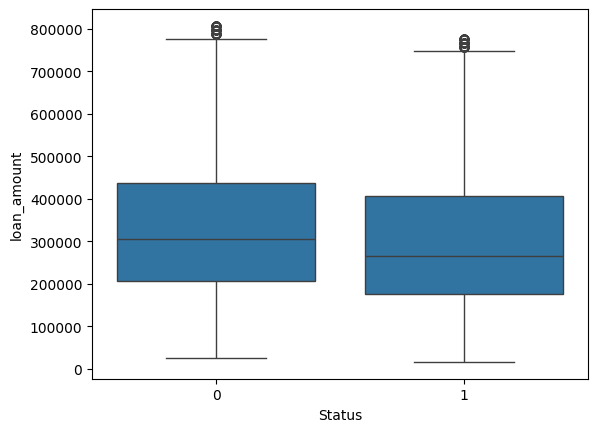

In [ ]:
def remove_outliers_iqr(data, column):
  """Removes outliers from a column using the IQR method."""
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


# Group data by Status
grouped = df.groupby('Status')

# Remove outliers for property_value within each group
df_no_outliers = pd.DataFrame()
for status, group in grouped:
  group_no_outliers = remove_outliers_iqr(group, 'loan_amount')
  df_no_outliers = pd.concat([df_no_outliers, group_no_outliers])


# Now df_no_outliers contains the data with outliers removed for property_value in each Status group.

# You can visualize the result using box plots:
sns.boxplot(x='Status', y='loan_amount', data=df_no_outliers)
plt.show()


Patern and Trend In Default rate :

1.Loan Limit

Fixed Loan Limit (cf): Borrowers with a fixed loan limit show a higher tendency to remain non-defaulters compared to those with a non-fixed loan limit (ncf).

Insight: Fixed loan limits might provide better financial predictability and management, reducing the risk of default.

2. Gender

Non-Defaulter Ratios: Different genders show varying tendencies toward default. For example, a certain gender might have a lower default rate.

Insight: Understanding gender-based trends can help tailor financial products and outreach strategies. However, care should be taken to avoid bias in lending practices.

3. Age Group

Young Borrowers (<25): Higher default rates (28.9%) among younger borrowers suggest they may be more financially unstable or less experienced.
Middle-Aged Borrowers (35-54): Show a relatively stable default rate.
Older Borrowers (>65): Also show increased default tendencies compared to younger groups but may have different reasons (e.g., income stability).

Insight: Age-related financial education and support could help mitigate default risks, particularly among younger borrowers.

4. Credit Score Grade

Credit Score Trends: All grades show similar default rates, indicating that credit scores might not be a strong predictor of default in this context.

Insight: Consideration should be given to other factors when evaluating risk beyond just credit scores.

5. Loan Purpose

Varying Default Rates: Different loan purposes (e.g., home improvement, education) might show different tendencies.

Insight: Identifying the purpose of the loan could help in risk assessment. Some purposes may correlate with higher risks due to the nature of expenditure.

6. Region

Regional Differences: If certain regions show significantly higher default rates, this may be due to economic conditions or demographic factors.

Insight: Targeting financial education or support in high-risk regions can be effective in reducing defaults.

7. Co-Applicant Credit Type

Risk Levels: Different credit types for co-applicants affect default rates, with some credit types (like CIB) correlating with lower default rates.

Insight: Co-applicant profiles can serve as additional risk assessment tools in lending decisions.

8. Business vs. Commercial Loans

Default Trends: Businesses showing higher default rates compared to non-commercial loans indicate varying risk profiles.

Insight: Adjusting lending terms based on the type of loan can help mitigate risks.